In [1]:
!pip install nengo

     |████████████████████████████████| 378kB 23.9MB/s 


In [2]:
from IPython.core.display import HTML

## Hopfield Network

This is a hopfield net with pre-calculated weight matrix based on the initial model suggested by John Hopfield. The calculation of the weight matrix is based on the hebbian learning rule. W<sub>ij</sub> = (2V<sub>i</sub> - 1)(2V<sub>j</sub> - 1) where V is a pattern to be stored in the network. In case we want to store multiple patterns, W<sub>ij</sub> = sum of (2V<sub>i</sub> - 1)(2V<sub>j</sub> - 1) calculated for each pattern. Maximum number of patterns which can be stored in a hopfield net having n nodes = N/2logN. 
 
In this example, 
<br>mode 1 => has only one pattern stored in the network leading to one attractor (0101)
<br>mode 2 => has two patterns stored in the network leading to two attractors (01101,10101)

The network is perturbed with a random initial input and then allowed to settle. The value of the ensemble settles down at the attractor which is closest to the initial input. Though the network is not guaranteed to settle at one of the attractors, the probability of settling at an attractor is high if the input is close to one of the attractors. 

For example, if the initial input in mode 2 is 01100, the network will settle to 01101. This is because this initial input is closer to the attractor 01101 (only one bit flip) as compared to the attractor 10101 (3 bit flips).

In [3]:
%matplotlib inline
import nengo
from nengo.dists import Uniform
from nengo.utils.ensemble import response_curves
import matplotlib.pyplot as plt
import numpy as np

   
mode = 2
if mode == 1:
    N = 4      #number of neurons
    start =   np.random.rand(N)  
    #start =  np.array([0,1,0,1])   #single attractor
    #start =  np.array([0,1,0,0])   #All these vectors are just 1 bit flip away 
    #start =  np.array([1,1,0,1])   #from the single attractor in the network, so  
    #start =  np.array([0,1,1,1])   #using any of them as initial input will make  
    #start =  np.array([0,0,0,1])   #the network settle at the attractor 0101.
    weights = np.matrix('0 -1 1 -1; -1 0 -1 1; 1 -1 0 -1; -1 1 -1 0')
    
elif mode == 2:
    N = 5       #number of neurons
    start =   np.random.rand(N)
    #start =  np.array([0,1,1,0,1])   #first attractor
    #start =  np.array([0,1,1,0,0])   #Using any of these three vectors as initial input
    #start =  np.array([0,1,1,1,1])   #will make the network settle at the first attractor 01101
    #start =  np.array([0,1,0,0,1])   #since they are all just 1 bit flip away from it.
    
    #start =  np.array([1,0,1,0,1])   #second attractor
    #start =  np.array([1,0,1,0,0])   #Using any of these three vectors as initial input
    #start =  np.array([1,0,1,1,1])   #will make the network settle at the second attractor 10101
    #start =  np.array([1,0,0,0,1])   #since they are all just 1 bit flip away from it.
    
    weights = np.matrix('0 -2 0 0 0; -2 0 0 0 0; 0 0 0 -2 2; 0 0 -2 0 -2; 0 0 2 -2 0')

In [4]:
model = nengo.Network('Hopfield net')

with model:
    stim = nengo.Node(lambda t: start if (t<=.1) else [0]*N)
    ens = nengo.Ensemble(N, dimensions=N, 
                         encoders=np.eye(N), 
                         max_rates=Uniform(.999,.999),
                         intercepts=Uniform(-1,-1),
                         neuron_type=nengo.neurons.Sigmoid(tau_ref=1))
    
    conn = nengo.Connection(ens, ens, transform=weights, synapse=0)
    nengo.Connection(stim, ens, synapse=0)
    
    stim_p = nengo.Probe(stim)
    ens_p = nengo.Probe(ens.neurons, 'rates')   
    
sim = nengo.Simulator(model)
sim.run(3)
t = sim.trange()   

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


Mode: 2

Weights
[[ 0 -2  0  0  0]
 [-2  0  0  0  0]
 [ 0  0  0 -2  2]
 [ 0  0 -2  0 -2]
 [ 0  0  2 -2  0]]

Stimulus provided to the network (stim)
[0.02383621 0.92054504 0.65691657 0.05463428 0.49058536]

Final Ensemble Value (ens)
[0.96439155 0.9700493  0.97587658 0.95783686 0.97612596]


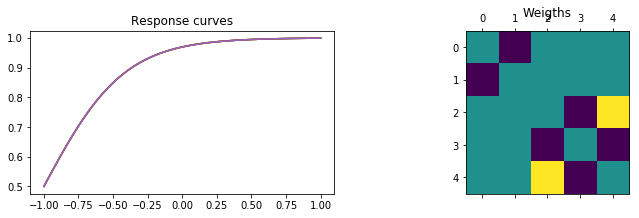

In [5]:
fig = plt.figure(figsize=(12, 3))
p0 = plt.subplot(1, 2, 1)
p0.plot(*response_curves(ens, sim));
p0.set_title("Response curves")

p1 = plt.subplot(1, 2, 2)
p1.matshow(weights);
p1.set_title("Weigths")

print "\nMode:", mode

print "\nWeights"
print weights

print "\nStimulus provided to the network (stim)"
print sim.data[stim_p][0]

print "\nFinal Ensemble Value (ens)"
print sim.data[ens_p][-1]

The above output shows that when a random initial stimulus is provided to the network in mode 1, the ensemble value settles down to 0101 i.e., at the attractor for mode1.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


Mode: 2

Weights
[[ 0 -2  0  0  0]
 [-2  0  0  0  0]
 [ 0  0  0 -2  2]
 [ 0  0 -2  0 -2]
 [ 0  0  2 -2  0]]

Stimulus provided to the network (stim)
[0.02383621 0.92054504 0.65691657 0.05463428 0.49058536]

Final Ensemble Value (ens)
[0.9686576  0.96934926 0.97428394 0.96173463 0.97278785]


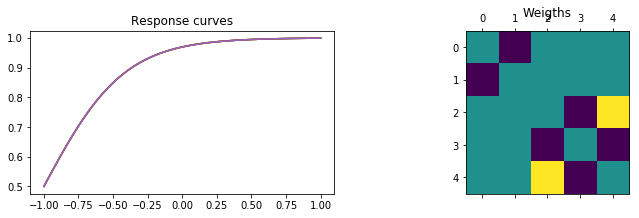

In [6]:
sim = nengo.Simulator(model)
sim.run(3)
t = sim.trange()

fig = plt.figure(figsize=(12, 3))
p0 = plt.subplot(1, 2, 1)
p0.plot(*response_curves(ens, sim));
p0.set_title("Response curves")

p1 = plt.subplot(1, 2, 2)
p1.matshow(weights);
p1.set_title("Weigths")

print "\nMode:", mode

print "\nWeights"
print weights

print "\nStimulus provided to the network (stim)"
print sim.data[stim_p][0]

print "\nFinal Ensemble Value (ens)"
print sim.data[ens_p][-1]

The above output shows that when a random initial stimulus is provided to the network in mode 2, the ensemble value settles down to 01101 i.e., at one of the attractors for mode2.